# Linear Regression Modelling
1. run a basic LR on all available data
2. check for anything interesting and see if features can be narrowed down or transformed
3. look for features with small p-values and larger coefficients
4. narrow down the number of features to ~10
5. then try LR with a polynomial

## Relevant Files
    1. df_basic.pkl

In [2]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

/Users/carliebadder/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Read in relevant file
df = pd.read_pickle('df_basic.pkl')

In [4]:
df.head()

,RT Score,Title,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,...,Thriller - Serial Killer,Zombie,Sci-Fi Horror,Thriller - Political,Horror Remake,Neo Noir,Horror - Slasher,Horror Comedy,Horror - Supernatural,Horror - R-Rated
0,23.0,Van Helsing,130.0,2004,5,1.600000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50.0,Hatchet,82.0,2007,9,2.842492e+07,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,55.0,V/H/S,116.0,2012,10,2.773318e+07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,23.0,Leprechaun,91.0,1993,1,1.000000e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,67.0,The Howling,91.0,1981,4,5.000000e+07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Functions used throughout Notebook

In [5]:
# calculate MSE
def find_mse(res):
    sse = sum([x**2 for x in res])
    return sse/(len(res))

In [6]:
# Find the Linear Regression Model
def LR_model(x,y, dat):
    model = smf.ols('y ~ x', data=dat)
    fit = model.fit()
    pred = fit.predict(x)
    res = np.subtract(y, pred)
    summary = fit.summary()
    
    return [pred, res, summary]

In [7]:
def plot_regfit_res(x, y, feature, pred, res):

    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(2, 2, 1)
    ax.scatter(x.iloc[:,feature], y, label='truth')
    ax.scatter(x.iloc[:,feature], pred, color='r', label='predictions')
    ax.set(title="Regression fit", 
           xlabel='x', ylabel='y')
    ax.legend(loc='best')

    ax = fig.add_subplot(2, 2, 2)
    ax.scatter(pred, res)
    ax.hlines([0], xmin=min(pred), xmax=max(pred), color='k')
    ax.set(title="Residual plot",
           xlabel='prediction', ylabel='residuals')
    

In [8]:
# Collecting MSE values for each model
mse_list = []

## BASIC LR ALL SUBGENRES, NO TRANSFORMATIONS

In [9]:
# FIRST LINEAR REGRESSION
# x and y matrices
ya = df['RT Score']
Xa = df[['Release Year', 'Release Month',
        'Runtime', 'Production Budget Full', 'Terrorism',
       'Future - Near', 'Sci-Fi Remake', 'Remake - Asian', 'Post-Apocalypse',
       'Video Game Adaptation', 'Prequel', 'Comedy - Spoof',
       'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']] 

# Find the basic LR model
preda, resa, summarya = LR_model(Xa, ya, df)
msea = find_mse(resa)
summarya

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     7.089
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           6.99e-31
Time:                        15:58:06   Log-Likelihood:                -4034.9
No. Observations:                 879   AIC:                             8148.
Df Residuals:                     840   BIC:                             8334.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    340.0379    174.942      1.944      0.052      -3.337     683.413
x[0]          -0.1701      0.087     -1.959      0.050      -0.341       0.000
x[1]           0.2494      0.250      0.999      0.318      -0.241       0.740
x[2]           0.4592      0.067      6.832      0.000       0.327       0.591
x[3]       -1.268e-07   4.15e-08     -3.059      0.002   -2.08e-07   -4.55e-08
x[4]          -5.5676      8.164     -0.682      0.495     -21.592      10.457
x[5]          -6.9178      8.436     -0.820      0.412     -23.476       9.640
x[6]          16.2489      8.889      1.828      0.068      -1.199      33.697
x[7]          -4.0192     11.369     -0.354      0.724     -26.335      18.297
x[8]          14.5980      8.547      1.708      0.088      -2.179      31.375
x[9]         -32.6589      8.141     -4.012      0.000     -48.638     -16.680
x[10]         -9.2863      7.234     -1.284      0.200     -23.484       4.912
x[11]        -26.4695      7.437     -3.559      0.000     -41.066     -11.873
x[12]         -1.8611      6.689     -0.278      0.781     -14.990      11.268
x[13]         17.7790      7.295      2.437      0.015       3.461      32.097
x[14]         -1.2781      7.186     -0.178      0.859     -15.383      12.827
x[15]         -9.7735      6.716     -1.455      0.146     -22.956       3.409
x[16]         -0.7683      8.877     -0.087      0.931     -18.193      16.656
x[17]         20.9968      6.729      3.120      0.002       7.788      34.205
x[18]          7.4054      6.225      1.190      0.234      -4.812      19.623
x[19]          1.9515      7.030      0.278      0.781     -11.846      15.749
x[20]         -1.5474      5.903     -0.262      0.793     -13.134      10.039
x[21]          1.7998      6.401      0.281      0.779     -10.763      14.363
x[22]         -9.1181      5.974     -1.526      0.127     -20.845       2.609
x[23]         -7.7415      4.794     -1.615      0.107     -17.151       1.668
x[24]         11.1464      4.784      2.330      0.020       1.757      20.536
x[25]         -8.0120      4.871     -1.645      0.100     -17.573       1.550
x[26]         -8.7016      4.225     -2.059      0.040     -16.995      -0.408
x[27]         -2.6773      4.095     -0.654      0.513     -10.715       5.361
x[28]         -1.0943      4.141     -0.264      0.792      -9.222       7.034
x[29]          7.1019      4.289      1.656      0.098      -1.318      15.521
x[30]          1.5897      4.099      0.388      0.698      -6.457       9.636
x[31]         12.7756      4.457      2.866      0.004       4.027      21.524
x[32]          0.3323      3.920      0.085      0.932      -7.361       8.026
x[33]         15.2629      4.060      3.759      0.000       7.294      23.232
x[34]        -11.1991      3.169     -3.533      0.000     -17.420      -4.978
x[

In [10]:
# Add mse value to list and calc the RMSE
mse_list.append(('LR all SG 37X', msea))
np.sqrt(msea)

23.840961913793873

In [11]:
# To get coefficients had to run model without using function above
model = smf.ols('ya ~ Xa', data=df)
fit = model.fit()
pred = fit.predict(Xa)
res = np.subtract(ya, pred)
coef = fit.params

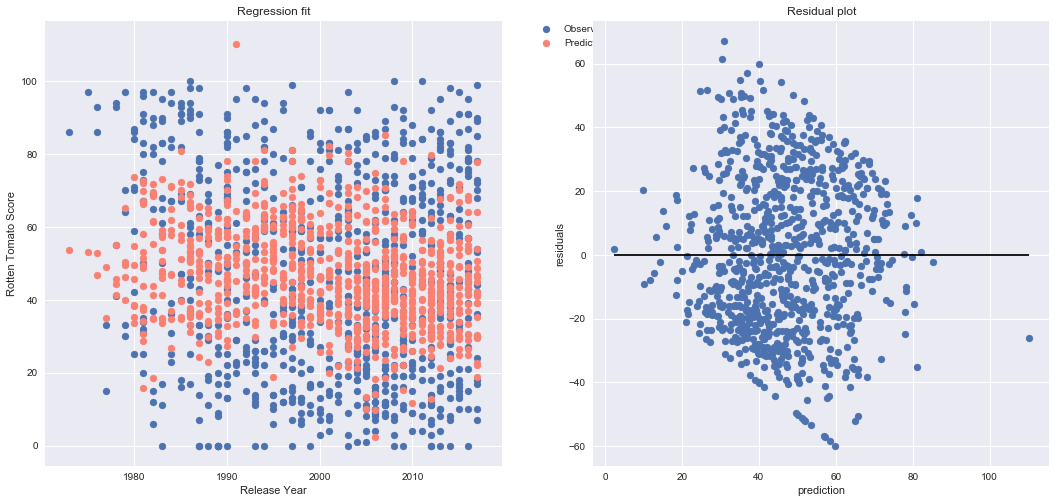

In [12]:
# Plot observed and predicted values for each individual feature
fig = plt.figure(figsize=(18, 18));
ax = fig.add_subplot(2, 2, 1);
ax.scatter(Xa.iloc[:,0], ya, label='Observed');
ax.scatter(Xa.iloc[:,0], preda, color='salmon', label='Predicted');
ax.set(title="Regression fit", 
       xlabel='Release Year', ylabel='Rotten Tomato Score');
ax.legend(bbox_to_anchor=(1.24, 1),borderaxespad=0);

# Plot the residuals for the model
ax = fig.add_subplot(2, 2, 2)
ax.scatter(preda, resa)
ax.hlines([0], xmin=min(preda), xmax=max(preda), color='k')
ax.set(title="Residual plot",
       xlabel='prediction', ylabel='residuals')

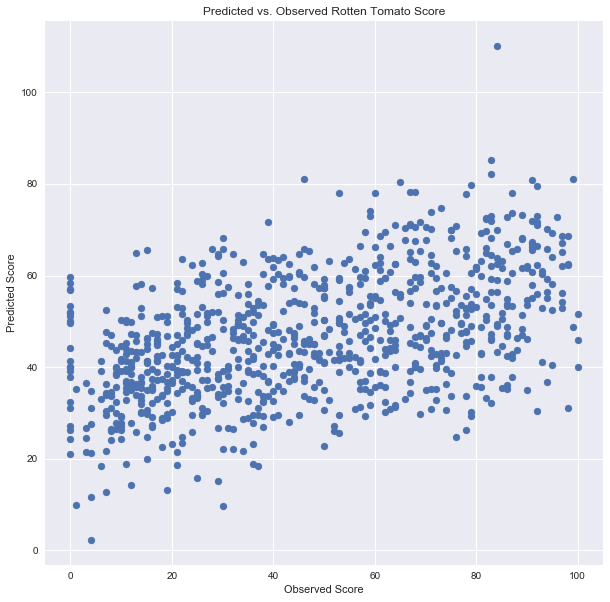

In [13]:
# Plot the predicted vs the observed Y (Rotten Tomato Score)
figa = plt.figure(figsize=(10,10));
plt.scatter(ya, preda)
plt.title('Predicted vs. Observed Rotten Tomato Score')
plt.xlabel('Observed Score')
plt.ylabel('Predicted Score')

In [14]:
# Pull out features with lowest p-values and highest coefficients (focus on subgenres)
low_pval = [9,11,13,17,24,26,31,33,34,35,36,37]
sg_low_pval=[]
for i in range(len(Xa.columns)):
    if i in low_pval:
        sg_low_pval.append((i, Xa.columns[i], coef[i+1]))
        
# sort the p-value list
sg_low_pval.sort(key=lambda x: x[2])

## Dumb Model - use the mean of 'Rotten Scores'

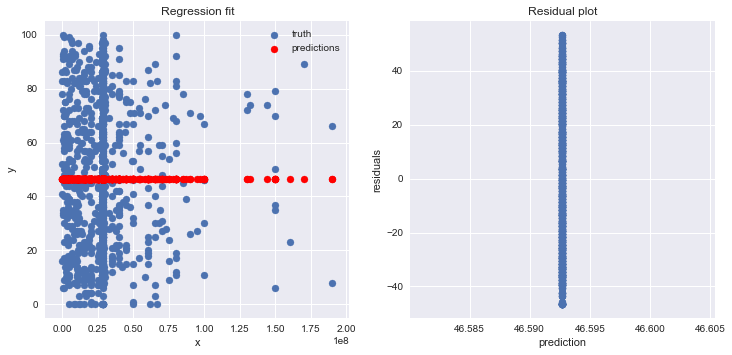

In [16]:
y_dumb = df['RT Score']
X_dumb = df[['Release Year', 'Release Month',
       'Runtime', 'Production Budget Full', 'Terrorism',
       'Future - Near', 'Sci-Fi Remake', 'Remake - Asian', 'Post-Apocalypse',
       'Video Game Adaptation', 'Prequel', 'Comedy - Spoof',
       'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']]

# Create the baseline model
X_dumb = sm.add_constant(X_dumb)
pred_dumb = [np.mean(y_dumb)]*len(y_dumb)
res_dumb = y_dumb - pred_dumb
mse_dumb = find_mse(res_dumb)

# Add the MSE to list and calculate the RMSE
mse_list.append(('LR Dumb Model',mse_dumb))
np.sqrt(mse_dumb)

# plot the dumb model
plot_regfit_res(X_dumb, y_dumb, 4, pred_dumb, res_dumb)

In [17]:
df.columns

Index(['RT Score', 'Title', 'Runtime', 'Release Year', 'Release Month',
       'Production Budget Full', 'Terrorism', 'Future - Near', 'Sci-Fi Remake',
       'Remake - Asian', 'Post-Apocalypse', 'Video Game Adaptation', 'Prequel',
       'Comedy - Spoof', 'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated'],
      dtype='object')

## First LR is ok - going to check variables for skewed distributions and apply transformations

'RT Score', 'Title', 'Domestic Total', 'Release Date', 'Runtime',
'Production Budget', 'Release Year', 'Release Month',
'Horror - Torture', 'Horror - Period',
'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
'Horror - R-Rated'

In [18]:
# Check the correlations of each independent variable with the dependent
df.corr()
# Runtime has the strongest correlation individually with rotten tomato score- need to check correlation plots

,RT Score,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,Post-Apocalypse,...,Thriller - Serial Killer,Zombie,Sci-Fi Horror,Thriller - Political,Horror Remake,Neo Noir,Horror - Slasher,Horror Comedy,Horror - Supernatural,Horror - R-Rated
RT Score,1.000000,0.288070,-0.115264,0.061581,0.004964,0.048737,0.025952,0.055834,-0.080909,0.080860,...,-0.005305,0.076688,-0.007008,0.184271,-0.072280,0.176199,-0.136465,0.051448,-0.156291,-0.071161
Runtime,0.288070,1.000000,-0.122555,0.069181,0.272209,0.150164,0.036043,-0.039806,-0.032994,-0.001533,...,0.129198,-0.094254,-0.038487,0.350821,-0.067081,0.114136,-0.158765,-0.183788,-0.072257,-0.162246
Release Year,-0.115264,-0.122555,1.000000,-0.082556,0.036464,-0.000479,-0.015922,-0.066113,0.069184,0.008208,...,-0.008617,-0.006772,-0.016970,-0.032051,0.106895,-0.114998,-0.190884,-0.025828,0.212398,0.035488
Release Month,0.061581,0.069181,-0.082556,1.000000,0.018558,0.009727,-0.005503,0.028002,-0.033073,-0.023778,...,0.014257,0.000114,-0.034468,0.058925,-0.028869,-0.045493,0.050809,0.031465,-0.012479,0.026238
Production Budget Full,0.004964,0.272209,0.036464,0.018558,1.000000,0.149841,0.106574,0.116906,-0.025073,0.081229,...,0.004269,0.039837,0.130417,0.157439,0.022258,-0.077234,-0.058004,0.011681,-0.092737,-0.086925
Terrorism,0.048737,0.150164,-0.000479,0.009727,0.149841,1.000000,-0.012673,-0.012673,-0.013244,-0.012673,...,-0.028516,-0.027939,-0.030470,0.401722,-0.031811,-0.032597,-0.038021,-0.039187,-0.047533,-0.117684
Future - Near,0.025952,0.036043,-0.015922,-0.005503,0.106574,-0.012673,1.000000,0.079388,-0.013244,0.355572,...,-0.028516,-0.027939,0.213012,0.007842,-0.031811,0.005709,-0.038021,-0.039187,-0.047533,0.005244
Sci-Fi Remake,0.055834,-0.039806,-0.066113,0.028002,0.116906,-0.012673,0.079388,1.000000,-0.013244,0.079388,...,-0.028516,-0.027939,0.253592,-0.031546,0.320159,-0.032597,-0.038021,-0.039187,-0.047533,0.005244
Remake - Asian,-0.080909,-0.032994,0.069184,-0.033073,-0.025073,-0.013244,-0.013244,-0.013244,1.000000,-0.013244,...,-0.029801,-0.029198,-0.031843,-0.032968,0.416329,-0.034066,-0.039734,-0.040953,0.251269,-0.103361
Post-Apocalypse,0.080860,-0.001533,0.008208,-0.023778,0.081229,-0.012673,0.355572,0.079388,-0.013244,1.000000,...,-0.028516,0.278491,0.091271,-0.031546,0.046404,-0.032597,-0.038021,-0.039187,-0.047533,0.025732


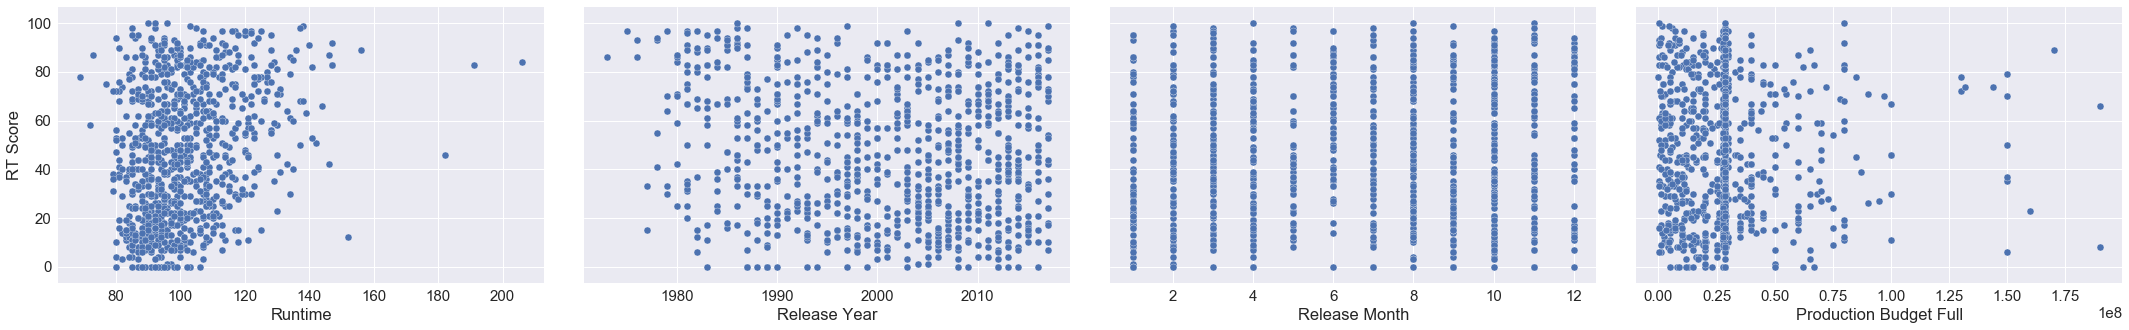

In [108]:
# Plot variable-to-variable relations as scatterplots
sns.pairplot(df, size = 5, aspect=1.5,
            y_vars=['RT Score'],
            x_vars=['Runtime', 'Release Year', 'Release Month','Production Budget Full'])

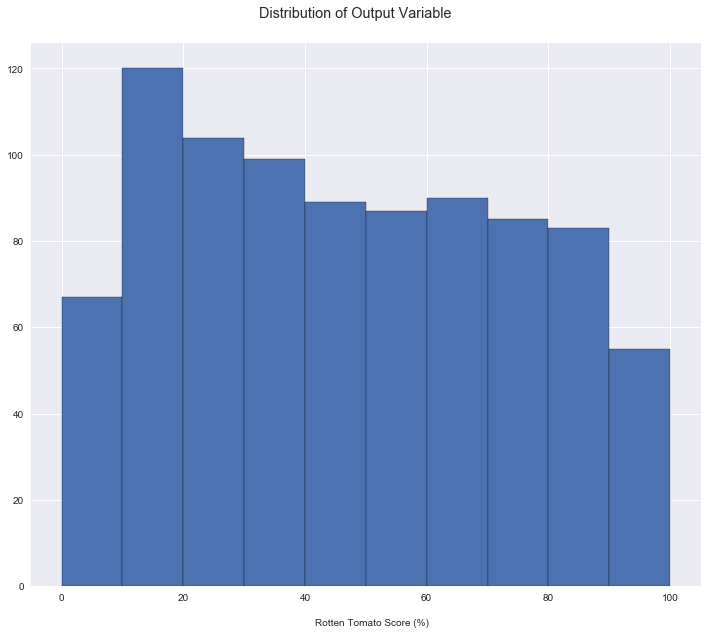

In [19]:
# Check the y-variable (the output, the Rotten Tomato Scores)
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
plt.suptitle('Distribution of Output Variable', x=0.5, y=.93, ha='center', fontsize='x-large')
fig.text(0.52, 0.07, 'Rotten Tomato Score (%)', ha='center')
df['RT Score'].hist(figsize=(12,10), ax=axes, edgecolor='black');
# weirdly uniform distribution

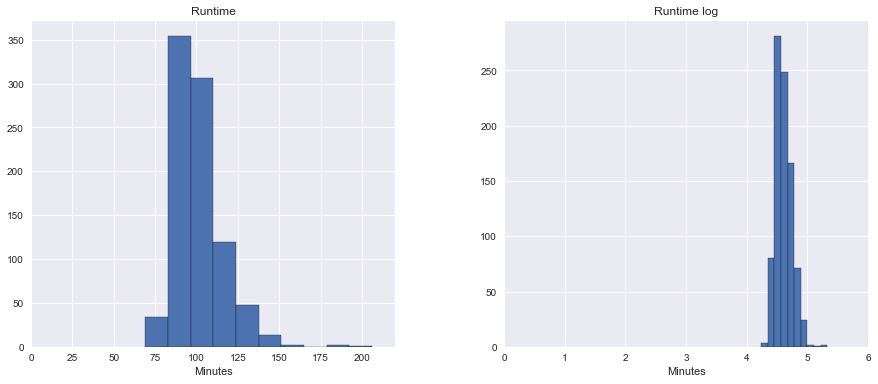

In [20]:
# MOVIE RUNTIME
df['Runtime log'] = np.log(df['Runtime']) # better with log to remove right skew

fig2, axes2 = plt.subplots(nrows=1, ncols=2, figsize=(15,6));
df.hist(column=['Runtime'], ax=axes2[0],edgecolor='k');
df.hist(column=['Runtime log'], ax=axes2[1],edgecolor='k');
axes2[0].set(xlabel='Minutes', xlim=(0,220));
axes2[1].set(xlabel='Minutes', xlim=(0,6));

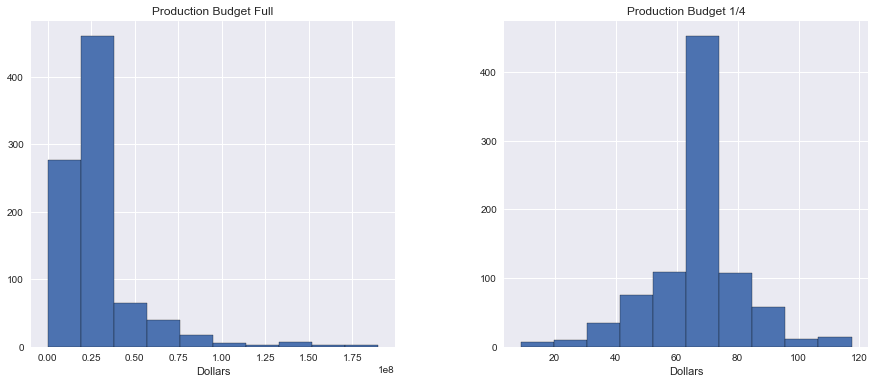

In [21]:
# MOVIE PRODUCTION BUDGET
df['Production Budget 1/4'] = np.sqrt(np.sqrt(df['Production Budget Full'])) # skewed right

fig3, axes3 = plt.subplots(nrows=1, ncols=2, figsize=(15,6));
df.hist(column=['Production Budget Full'], ax=axes3[0],edgecolor='k');
df.hist(column=['Production Budget 1/4'], ax=axes3[1],edgecolor='k');
axes3[0].set(xlabel='Dollars');
axes3[1].set(xlabel='Dollars');

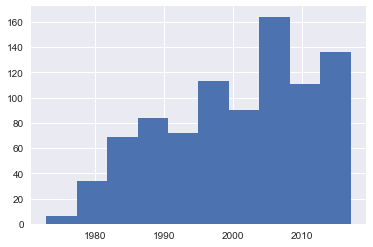

In [22]:
# RELEASE YEAR
(df['Release Year']).hist() # not much to do here

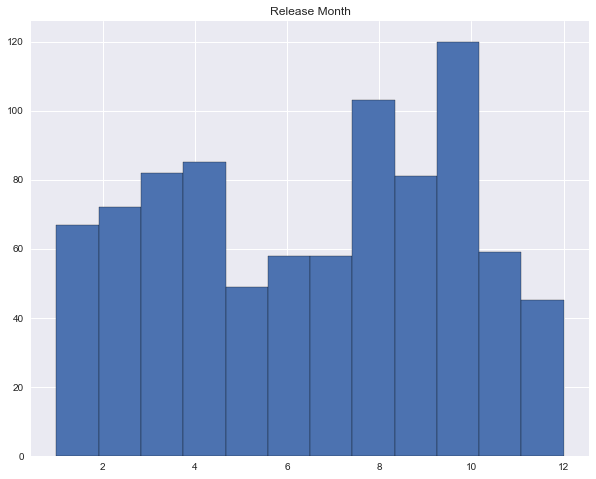

In [23]:
# RELEASE MONTH
fig4, axes4 = plt.subplots(nrows=1, ncols=1, figsize=(10,8)); 
df.hist(column=['Release Month'],bins=12, ax=axes4, edgecolor='k');
# also fine - more releases in the month of October maybe

## BASIC LR - NO TRANSFORMATIONS, TOP SUB GENRES
- no transformations
- just removing sub genres with fewer than 25 movies in the category
- looking for correlations, low p-values, and high coefficients
- want to get down to ~10 features only

In [24]:
# FIRST LINEAR REGRESSION
y1 = df['RT Score']
X1 = df[[ 'Runtime',
       'Production Budget Full', 'Release Year', 'Release Month',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']] 

pred1, res1, summary1 = LR_model(X1,y1, df)
mse1 = find_mse(res1)

In [25]:
sse = sum([x**2 for x in res1])
#     return sse/(len(res))

In [26]:
for s in res1:
    if np.isnan(s):
        print('here')

In [27]:
summary1 # taking out subgenres was not helpful

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     10.22
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           1.36e-27
Time:                        15:59:16   Log-Likelihood:                -4067.6
No. Observations:                 879   AIC:                             8175.
Df Residuals:                     859   BIC:                             8271.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    313.0799    172.801      1.812      0.070     -26.082     652.241
x[0]           0.4569      0.068      6.749      0.000       0.324       0.590
x[1]       -1.041e-07   3.86e-08     -2.695      0.007    -1.8e-07   -2.83e-08
x[2]          -0.1574      0.086     -1.835      0.067      -0.326       0.011
x[3]           0.3406      0.255      1.335      0.182      -0.160       0.841
x[4]          -7.0918      4.865     -1.458      0.145     -16.640       2.456
x[5]          10.8071      4.806      2.249      0.025       1.375      20.239
x[6]          -7.6778      4.749     -1.617      0.106     -16.999       1.643
x[7]         -10.1684      4.127     -2.464      0.014     -18.268      -2.069
x[8]          -3.5429      3.921     -0.904      0.366     -11.238       4.153
x[9]          -1.2848      4.070     -0.316      0.752      -9.273       6.703
x[10]          7.7962      3.908      1.995      0.046       0.127      15.466
x[11]          0.8105      3.700      0.219      0.827      -6.452       8.073
x[12]         13.4018      4.181      3.205      0.001       5.196      21.608
x[13]          1.7113      3.364      0.509      0.611      -4.892       8.314
x[14]         15.7089      3.965      3.962      0.000       7.927      23.491
x[15]        -11.1555      3.146     -3.546      0.000     -17.330      -4.981
x[16]          9.8772      3.226      3.062      0.002       3.545      16.209
x[17]         -9.3608      2.829     -3.309      0.001     -14.912      -3.809
x[18]          4.7527      2.240      2.122      0.034       0.357       9.149
==============================================================================
Omnibus:                       66.940   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.624
Skew:                           0.156   Prob(JB):                     2.73e-06
Kurtosis:                       2.224   Cond. No.                     7.60e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
mse_list.append(('First LR 18X', mse1))
mse1, np.sqrt(mse1)

(612.29258649607743, 24.744546601141785)

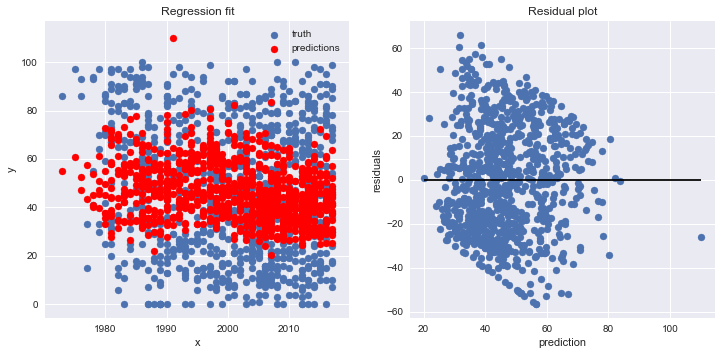

In [30]:
# plot the regression fit for various features and the residual plot
plot_regfit_res(X1, y1, 2, pred1, res1)

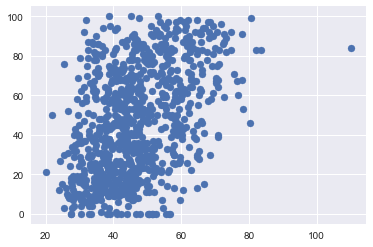

In [31]:
plt.scatter(pred1, y1) # predicted vs. observed rotten tomato score

## LR WITH TRANSFORMED VARIABLES, TOP SUBGENRES

In [33]:
# SECOND LINEAR REGRESSION
y2 = df['RT Score']
X2 = df[['Runtime log',  'Release Month',
       'Production Budget 1/4', 'Release Year', 
        'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake',  'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural', 'Horror - R-Rated']]

pred2, res2, summary2 = LR_model(X2,y2, df)
mse2 = find_mse(res2)
summary2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     10.60
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           8.89e-29
Time:                        16:00:40   Log-Likelihood:                -4064.6
No. Observations:                 879   AIC:                             8169.
Df Residuals:                     859   BIC:                             8265.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    156.4702    178.303      0.878      0.380    -193.491     506.432
x[0]          50.1963      7.286      6.890      0.000      35.896      64.496
x[1]           0.3536      0.254      1.392      0.164      -0.145       0.852
x[2]          -0.2229      0.059     -3.803      0.000      -0.338      -0.108
x[3]          -0.1654      0.085     -1.938      0.053      -0.333       0.002
x[4]          -7.8480      4.859     -1.615      0.107     -17.386       1.690
x[5]          10.8173      4.784      2.261      0.024       1.427      20.208
x[6]          -8.2859      4.734     -1.750      0.080     -17.577       1.005
x[7]         -10.3532      4.101     -2.524      0.012     -18.403      -2.303
x[8]          -3.2093      3.909     -0.821      0.412     -10.882       4.463
x[9]          -1.3528      4.056     -0.333      0.739      -9.315       6.609
x[10]          7.7698      3.893      1.996      0.046       0.128      15.412
x[11]          0.8473      3.672      0.231      0.818      -6.360       8.055
x[12]         13.6128      4.167      3.267      0.001       5.434      21.792
x[13]          2.2931      3.363      0.682      0.496      -4.309       8.895
x[14]         15.1044      3.953      3.821      0.000       7.347      22.862
x[15]        -10.9308      3.137     -3.484      0.001     -17.088      -4.773
x[16]          9.8319      3.218      3.056      0.002       3.516      16.147
x[17]         -9.9353      2.823     -3.519      0.000     -15.476      -4.394
x[18]          4.5152      2.229      2.026      0.043       0.140       8.890
==============================================================================
Omnibus:                       67.475   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.443
Skew:                           0.148   Prob(JB):                     2.99e-06
Kurtosis:                       2.221   Cond. No.                     4.24e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
mse_list.append(('LR Transformed 18X', mse2))
np.sqrt(mse2)

24.658917503537971

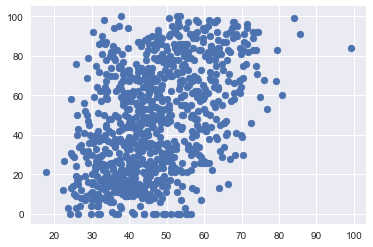

In [36]:
# plot_regfit_res(X2, y2, 0, pred2, res2)
plt.scatter(pred2, y2) # predicted vs. observed

## LR with variables with p-value less than 0.2 from transformed only features
X[0,5,7,10,12,14,15,16,17,18]

In [113]:
sg_pos

['Horror - R-Rated',
 'Horror - Period',
 'Horror Comedy',
 'Thriller - Political',
 'Neo Noir',
 'IMAX (Feature-length)',
 'Foreign Language']

In [114]:
dfP = pd.DataFrame()
dfP['RT Score'] = df['RT Score'] 
dfP['Video Game Adaptation'] = df['Video Game Adaptation'] 
dfP['Comedy - Spoof'] = df['Comedy - Spoof'] 
dfP['Horror - Slasher'] = df['Horror - Slasher'] 
dfP['Horror - Supernatural'] = df['Horror - Supernatural'] 
dfP['Vampire'] = df['Vampire']

dfP['Horror - R-Rated'] = df['Horror - R-Rated']
dfP['Neo Noir'] = df['Neo Noir']
dfP['Horror - Period'] = df['Horror - Period']
dfP['Horror Comedy'] = df['Horror Comedy']
dfP['Horror - R-Rated'] = df['Horror - R-Rated']
dfP['Thriller - Political'] = df['Thriller - Political']
dfP['IMAX (Feature-length)'] = df['IMAX (Feature-length)']
dfP['Foreign Language'] = df['Foreign Language']

yP = dfP['RT Score']
XP = dfP.iloc[:, 1:]

In [115]:
# LR WITH variables with smaller p-values
predP, resP, summaryP = LR_model(XP, yP, dfP)
mseP = find_mse(resP)
summaryP

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     13.64
Date:                Sat, 07 Oct 2017   Prob (F-statistic):           4.01e-26
Time:                        13:54:04   Log-Likelihood:                -4081.1
No. Observations:                 879   AIC:                             8188.
Df Residuals:                     866   BIC:                             8250.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.6095      1.838     23.183      0.000      39.002      46.217
x[0]         -28.9404      7.488     -3.865      0.000     -43.637     -14.244
x[1]         -29.4197      7.597     -3.873      0.000     -44.330     -14.510
x[2]         -12.0539      2.951     -4.085      0.000     -17.846      -6.262
x[3]         -10.7227      2.551     -4.203      0.000     -15.730      -5.715
x[4]          -9.8523      4.064     -2.424      0.016     -17.829      -1.876
x[5]           5.3585      2.028      2.643      0.008       1.379       9.338
x[6]          20.6552      3.578      5.773      0.000      13.632      27.678
x[7]          11.7842      4.788      2.461      0.014       2.386      21.182
x[8]          12.1762      3.125      3.896      0.000       6.042      18.310
x[9]          20.6582      3.663      5.640      0.000      13.469      27.847
x[10]         13.8008      6.687      2.064      0.039       0.676      26.925
x[11]         19.4209      6.887      2.820      0.005       5.904      32.938
==============================================================================
Omnibus:                       69.192   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.740
Skew:                           0.116   Prob(JB):                     4.24e-06
Kurtosis:                       2.211   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
mse_list.append(('LR Low P-value X', mseP))
np.sqrt(mseP)

25.127141462348796

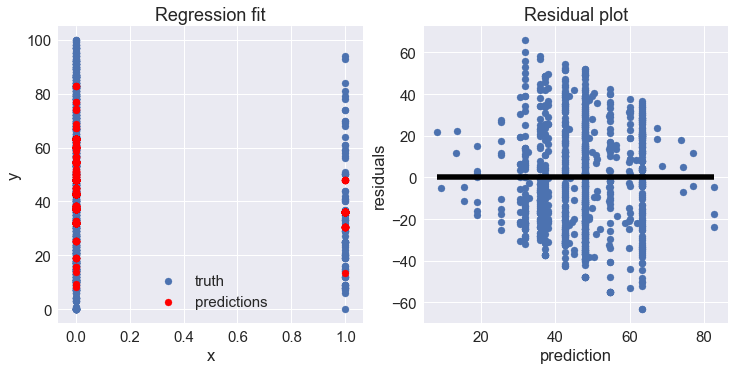

In [118]:
plot_regfit_res(XP, yP, 2, predP, resP)

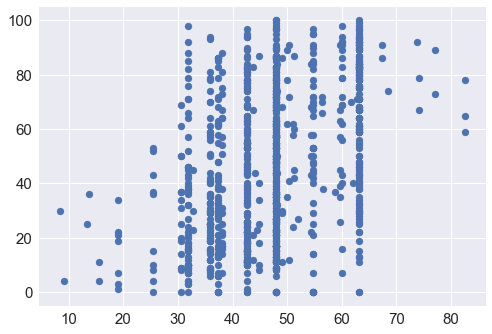

In [121]:
plt.scatter(predP, yP) # predicted vs observed

## HEAT MAP of RT SCORE for SUB GENRE VS DECADE
Test to see if certain genres did better in different decades.
This would demonstrate the evolution of horror films over the years; how different genres became popular during each decade due to changes in culture and entertainment preferences.

In [43]:
df_decgen_pre = pd.DataFrame()

In [44]:
df_decgen_pre = df[df.columns[6:40]] # all the sub genres

In [45]:
df_decgen_pre['RT Score'] = df['RT Score']
df_decgen_pre['Release Year'] = df['Release Year']

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
col = df_decgen_pre.columns

In [47]:
for i in range(0,34):
    df_decgen_pre[col[i]] = df_decgen_pre[col[i]] * df_decgen_pre['RT Score']

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
df_decgen_pre.drop('RT Score', axis=1, inplace=True)

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
def round_down(num, divisor):
    return num - (num%divisor)

In [50]:
df_decgen_pre['Release Year'] = [round_down(num, 10) for num in df_decgen_pre['Release Year']]

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
# group by decade and take the mean
df_decgen = (df_decgen_pre.groupby('Release Year', as_index=True)[df_decgen_pre.columns[0:34]].mean()) 

In [52]:
df_decgen.rename(index=str, columns={"Thriller - Psycho / Stalker / Blank from Hell": "Thriller - Psycho / Stalker"},inplace=True)

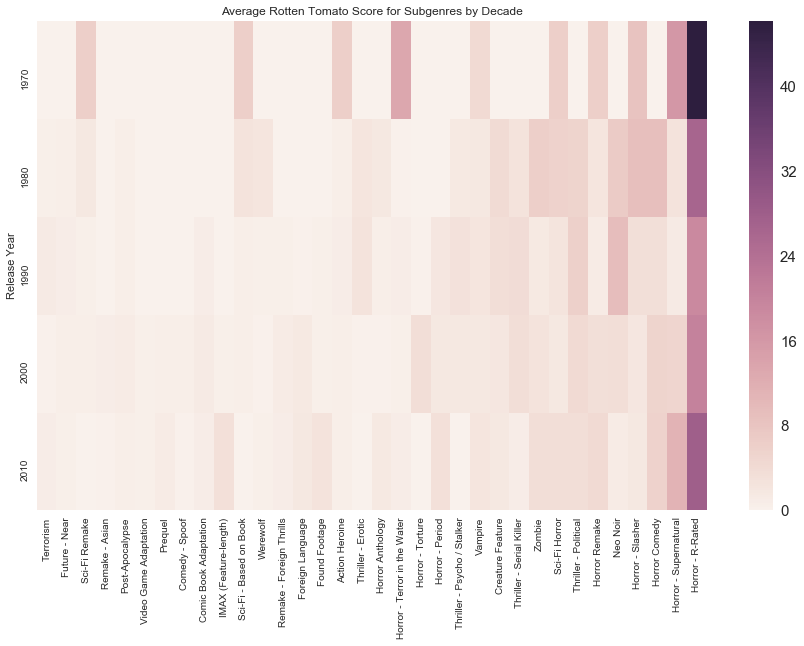

In [53]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9));
ax.set_title('Average Rotten Tomato Score for Subgenres by Decade')
# sns.set_style({"yticklabels": 'horizontal'})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5.5})
sns.heatmap(df_decgen, annot=False);

## Change Years to Decades to Categories
The results from the heatmap might suggest the each decade demostrated slightly different trends in genre - so we'll lose the genres and sort the years

In [54]:
decade_name_list = ['dec[1970]', 'dec[1980]', 'dec[1990]', 'dec[2000]', 'dec[2010]']
decade_list = [1970, 1980, 1990, 2000, 2010]

for i, dec in enumerate(decade_list):
    temp = []
    for j, row in df.iterrows():
        if round_down(row['Release Year'], 10) == dec:
            temp.append(1)
        else:
            temp.append(0)
    df[decade_name_list[i]] = temp

In [55]:
df_yrcat = df[['RT Score', 'Title', 'Runtime log', 'Runtime', 'Production Budget 1/4',
                  'Production Budget Full', 'Release Month',
                  'dec[1970]', 'dec[1980]', 'dec[1990]', 'dec[2000]', 'dec[2010]']]

In [56]:
df_yrcat.corr()

,RT Score,Runtime log,Runtime,Production Budget 1/4,Production Budget Full,Release Month,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010]
RT Score,1.000000,0.285985,0.288070,-0.028733,0.004964,0.061581,0.092369,0.115212,-0.035011,-0.113215,0.029485
Runtime log,0.285985,1.000000,0.992535,0.251440,0.274151,0.066527,0.047814,-0.038704,0.160854,0.003989,-0.144774
Runtime,0.288070,0.992535,1.000000,0.245457,0.272209,0.069181,0.045173,-0.044053,0.160592,0.005501,-0.140731
Production Budget 1/4,-0.028733,0.251440,0.245457,1.000000,0.850556,0.023788,-0.022009,0.014054,0.004970,0.029920,-0.042704
Production Budget Full,0.004964,0.274151,0.272209,0.850556,1.000000,0.018558,-0.033828,-0.034944,-0.007137,0.023486,0.022097
Release Month,0.061581,0.066527,0.069181,0.023788,0.018558,1.000000,0.047273,0.021603,0.008277,0.039692,-0.083741
dec[1970],0.092369,0.047814,0.045173,-0.022009,-0.033828,0.047273,1.000000,-0.059287,-0.074976,-0.090322,-0.076130
dec[1980],0.115212,-0.038704,-0.044053,0.014054,-0.034944,0.021603,-0.059287,1.000000,-0.256040,-0.308443,-0.259981
dec[1990],-0.035011,0.160854,0.160592,0.004970,-0.007137,0.008277,-0.074976,-0.256040,1.000000,-0.390066,-0.328779
dec[2000],-0.113215,0.003989,0.005501,0.029920,0.023486,0.039692,-0.090322,-0.308443,-0.390066,1.000000,-0.396069


In [57]:
yd = df_yrcat['RT Score']
Xd = df_yrcat[['Production Budget 1/4', 'Release Month', 'Runtime',
                'dec[1970]', 'dec[1980]', 'dec[1990]', 'dec[2000]', 'dec[2010]']]

pred_dec, res_dec, summary_dec = LR_model(Xd, yd, df_yrcat)
mse_dec = find_mse(res_dec)
summary_dec

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     19.11
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           7.62e-24
Time:                        16:02:42   Log-Likelihood:                -4094.4
No. Observations:                 879   AIC:                             8205.
Df Residuals:                     871   BIC:                             8243.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5765      5.724     -0.275      0.783     -12.811       9.658
x[0]          -0.1876      0.058     -3.254      0.001      -0.301      -0.074
x[1]           0.3569      0.259      1.379      0.168      -0.151       0.865
x[2]           0.6179      0.062      9.977      0.000       0.496       0.739
x[3]          11.2804      5.713      1.975      0.049       0.068      22.493
x[4]           4.0426      2.365      1.710      0.088      -0.599       8.684
x[5]          -8.1381      2.294     -3.547      0.000     -12.641      -3.635
x[6]          -8.4363      2.087     -4.043      0.000     -12.532      -4.341
x[7]          -0.3251      2.077     -0.157      0.876      -4.402       3.751
==============================================================================
Omnibus:                      111.297   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.508
Skew:                           0.156   Prob(JB):                     8.73e-08
Kurtosis:                       2.111   Cond. No.                     1.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [59]:
mse_list.append(('LR Decades as Categories', mse_dec))
mse_dec, np.sqrt(mse_dec)

(650.72727135961236, 25.509356545385703)

In [60]:
# DIVIDE YEARS INTO CATEGORIES PRE-2000 and POST-2000
mil_bin = []
for j, row in df.iterrows():
    if row['Release Year'] < 2000:
        mil_bin.append(0)
    else:
        mil_bin.append(1)


In [61]:
df['Post 2000'] = mil_bin

In [62]:
df.corr()

,RT Score,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,Post-Apocalypse,...,Horror - Supernatural,Horror - R-Rated,Runtime log,Production Budget 1/4,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010],Post 2000
RT Score,1.000000,0.288070,-0.115264,0.061581,0.004964,0.048737,0.025952,0.055834,-0.080909,0.080860,...,-0.156291,-0.071161,0.285985,-0.028733,0.092369,0.115212,-0.035011,-0.113215,0.029485,-0.080847
Runtime,0.288070,1.000000,-0.122555,0.069181,0.272209,0.150164,0.036043,-0.039806,-0.032994,-0.001533,...,-0.072257,-0.162246,0.992535,0.245457,0.045173,-0.044053,0.160592,0.005501,-0.140731,-0.117953
Release Year,-0.115264,-0.122555,1.000000,-0.082556,0.036464,-0.000479,-0.015922,-0.066113,0.069184,0.008208,...,0.212398,0.035488,-0.129110,-0.026893,-0.289317,-0.665764,-0.324378,0.273448,0.689113,0.860528
Release Month,0.061581,0.069181,-0.082556,1.000000,0.018558,0.009727,-0.005503,0.028002,-0.033073,-0.023778,...,-0.012479,0.026238,0.066527,0.023788,0.047273,0.021603,0.008277,0.039692,-0.083741,-0.035881
Production Budget Full,0.004964,0.272209,0.036464,0.018558,1.000000,0.149841,0.106574,0.116906,-0.025073,0.081229,...,-0.092737,-0.086925,0.274151,0.850556,-0.033828,-0.034944,-0.007137,0.023486,0.022097,0.041457
Terrorism,0.048737,0.150164,-0.000479,0.009727,0.149841,1.000000,-0.012673,-0.012673,-0.013244,-0.012673,...,-0.047533,-0.117684,0.151920,0.115253,-0.014833,-0.023304,0.054984,-0.033279,0.005832,-0.026245
Future - Near,0.025952,0.036043,-0.015922,-0.005503,0.106574,-0.012673,1.000000,0.079388,-0.013244,0.355572,...,-0.047533,0.005244,0.039478,0.060871,-0.014833,-0.023304,0.054984,-0.011334,-0.017793,-0.026245
Sci-Fi Remake,0.055834,-0.039806,-0.066113,0.028002,0.116906,-0.012673,0.079388,1.000000,-0.013244,0.079388,...,-0.047533,0.005244,-0.041218,0.091040,0.064186,0.058743,-0.016441,-0.011334,-0.041418,-0.046916
Remake - Asian,-0.080909,-0.032994,0.069184,-0.033073,-0.025073,-0.013244,-0.013244,-0.013244,1.000000,-0.013244,...,0.251269,-0.103361,-0.031645,-0.003024,-0.015501,-0.052936,-0.066945,0.150602,-0.045342,0.102190
Post-Apocalypse,0.080860,-0.001533,0.008208,-0.023778,0.081229,-0.012673,0.355572,0.079388,-0.013244,1.000000,...,-0.047533,0.025732,0.003449,0.009919,-0.014833,-0.023304,0.007367,0.032555,-0.017793,0.015098


In [63]:
ymil = df['RT Score']
xmil = df[[ 'Runtime log','Production Budget 1/4', 'Post 2000', 'Release Month']] 

pred_mil, res_mil, summary_mil = LR_model(xmil, ymil, df)
mse_mil = find_mse(res_mil)
summary_mil

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           2.62e-18
Time:                        16:03:05   Log-Likelihood:                -4112.7
No. Observations:                 879   AIC:                             8235.
Df Residuals:                     874   BIC:                             8259.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -225.0065     30.557     -7.364      0.000    -284.980    -165.033
x[0]          61.5468      6.774      9.086      0.000      48.251      74.842
x[1]          -0.1888      0.059     -3.212      0.001      -0.304      -0.073
x[2]          -2.3715      1.794     -1.322      0.187      -5.893       1.150
x[3]           0.3450      0.263      1.312      0.190      -0.171       0.861
==============================================================================
Omnibus:                      185.010   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.942
Skew:                           0.200   Prob(JB):                     7.80e-10
Kurtosis:                       2.007   Cond. No.                     2.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
mse_list.append(('LR Post200 Category', mse_mil))
mse_mil, np.sqrt(mse_mil)

(678.39721773827114, 26.046059543398712)

# Fall or not Fall

In [65]:
fall_mo = [8, 9,10] # Aug, Sept, Oct
fall_bin = []
for j, row in df.iterrows():
    if row['Release Month'] in fall_mo:
        fall_bin.append(1) # Released in the fall
    else:
        fall_bin.append(0)


In [66]:
df['Fall or not'] = fall_bin

In [67]:
df.corr()

,RT Score,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,Post-Apocalypse,...,Horror - R-Rated,Runtime log,Production Budget 1/4,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010],Post 2000,Fall or not
RT Score,1.000000,0.288070,-0.115264,0.061581,0.004964,0.048737,0.025952,0.055834,-0.080909,0.080860,...,-0.071161,0.285985,-0.028733,0.092369,0.115212,-0.035011,-0.113215,0.029485,-0.080847,-0.039911
Runtime,0.288070,1.000000,-0.122555,0.069181,0.272209,0.150164,0.036043,-0.039806,-0.032994,-0.001533,...,-0.162246,0.992535,0.245457,0.045173,-0.044053,0.160592,0.005501,-0.140731,-0.117953,-0.013748
Release Year,-0.115264,-0.122555,1.000000,-0.082556,0.036464,-0.000479,-0.015922,-0.066113,0.069184,0.008208,...,0.035488,-0.129110,-0.026893,-0.289317,-0.665764,-0.324378,0.273448,0.689113,0.860528,0.026808
Release Month,0.061581,0.069181,-0.082556,1.000000,0.018558,0.009727,-0.005503,0.028002,-0.033073,-0.023778,...,0.026238,0.066527,0.023788,0.047273,0.021603,0.008277,0.039692,-0.083741,-0.035881,0.547091
Production Budget Full,0.004964,0.272209,0.036464,0.018558,1.000000,0.149841,0.106574,0.116906,-0.025073,0.081229,...,-0.086925,0.274151,0.850556,-0.033828,-0.034944,-0.007137,0.023486,0.022097,0.041457,-0.079452
Terrorism,0.048737,0.150164,-0.000479,0.009727,0.149841,1.000000,-0.012673,-0.012673,-0.013244,-0.012673,...,-0.117684,0.151920,0.115253,-0.014833,-0.023304,0.054984,-0.033279,0.005832,-0.026245,-0.038822
Future - Near,0.025952,0.036043,-0.015922,-0.005503,0.106574,-0.012673,1.000000,0.079388,-0.013244,0.355572,...,0.005244,0.039478,0.060871,-0.014833,-0.023304,0.054984,-0.011334,-0.017793,-0.026245,-0.038822
Sci-Fi Remake,0.055834,-0.039806,-0.066113,0.028002,0.116906,-0.012673,0.079388,1.000000,-0.013244,0.079388,...,0.005244,-0.041218,0.091040,0.064186,0.058743,-0.016441,-0.011334,-0.041418,-0.046916,0.004210
Remake - Asian,-0.080909,-0.032994,0.069184,-0.033073,-0.025073,-0.013244,-0.013244,-0.013244,1.000000,-0.013244,...,-0.103361,-0.031645,-0.003024,-0.015501,-0.052936,-0.066945,0.150602,-0.045342,0.102190,0.017517
Post-Apocalypse,0.080860,-0.001533,0.008208,-0.023778,0.081229,-0.012673,0.355572,0.079388,-0.013244,1.000000,...,0.025732,0.003449,0.009919,-0.014833,-0.023304,0.007367,0.032555,-0.017793,0.015098,-0.038822


# Divide DF into pre-2000 and post-2000
see if two models could work
### Models for pre and post 2000 provide much better RMSE

In [68]:
df_pre2000 = pd.DataFrame()
df_post2000 = pd.DataFrame()

In [69]:
gb = df.groupby('Post 2000').groups

In [70]:
df.loc[gb[0]]

,RT Score,Title,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,...,Horror - R-Rated,Runtime log,Production Budget 1/4,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010],Post 2000,Fall or not
3,23.0,Leprechaun,91.0,1993,1,1.000000e+06,0,0,0,0,...,1,4.510860,31.622777,0,0,1,0,0,0,0
4,67.0,The Howling,91.0,1981,4,5.000000e+07,0,0,0,0,...,1,4.510860,84.089642,0,1,0,0,0,0,0
6,41.0,Innocent Blood,112.0,1992,9,1.500000e+04,0,0,0,0,...,1,4.718499,11.066819,0,0,1,0,0,0,1
8,33.0,Creepshow 2,87.0,1987,5,2.842492e+07,0,0,0,0,...,1,4.465908,73.017142,0,1,0,0,0,0,0
9,81.0,Scream 2,120.0,1997,12,2.400000e+07,0,0,0,0,...,1,4.787492,69.992710,0,0,1,0,0,0,0
12,31.0,Halloween II,93.0,1981,10,2.842492e+07,0,0,0,0,...,1,4.532599,73.017142,0,1,0,0,0,0,1
13,74.0,A Nightmare on Elm Street 3: Dream Warriors,96.0,1987,2,2.842492e+07,0,0,0,0,...,1,4.564348,73.017142,0,1,0,0,0,0,0
14,14.0,Halloween 5,96.0,1989,10,5.000000e+06,0,0,0,0,...,0,4.564348,47.287080,0,1,0,0,0,0,1
16,47.0,Teen Wolf,91.0,1985,8,2.842492e+07,0,0,0,0,...,0,4.510860,73.017142,0,1,0,0,0,0,1
17,23.0,Child's Play 3,90.0,1991,8,1.500000e+07,0,0,0,0,...,1,4.499810,62.233298,0,0,1,0,0,0,1


In [71]:
df_pre2000 = df.loc[gb[0]]

In [72]:
df_post2000 = df.loc[gb[1]]

In [73]:
df_post2000.to_pickle('df_post2000.pkl')
df_pre2000.to_pickle('df_pre2000.pkl')

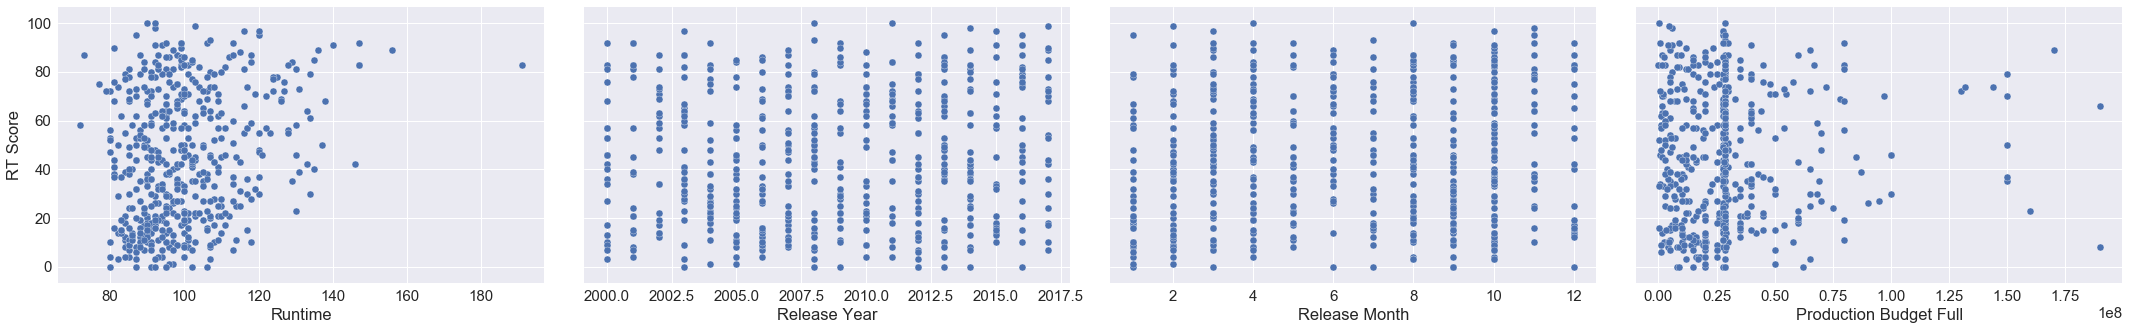

In [109]:
# Plot variable-to-variable relations as scatterplots
sns.pairplot(df_post2000, size = 5, aspect=1.5,
            y_vars=['RT Score'],
            x_vars=['Runtime', 'Release Year', 'Release Month','Production Budget Full'])

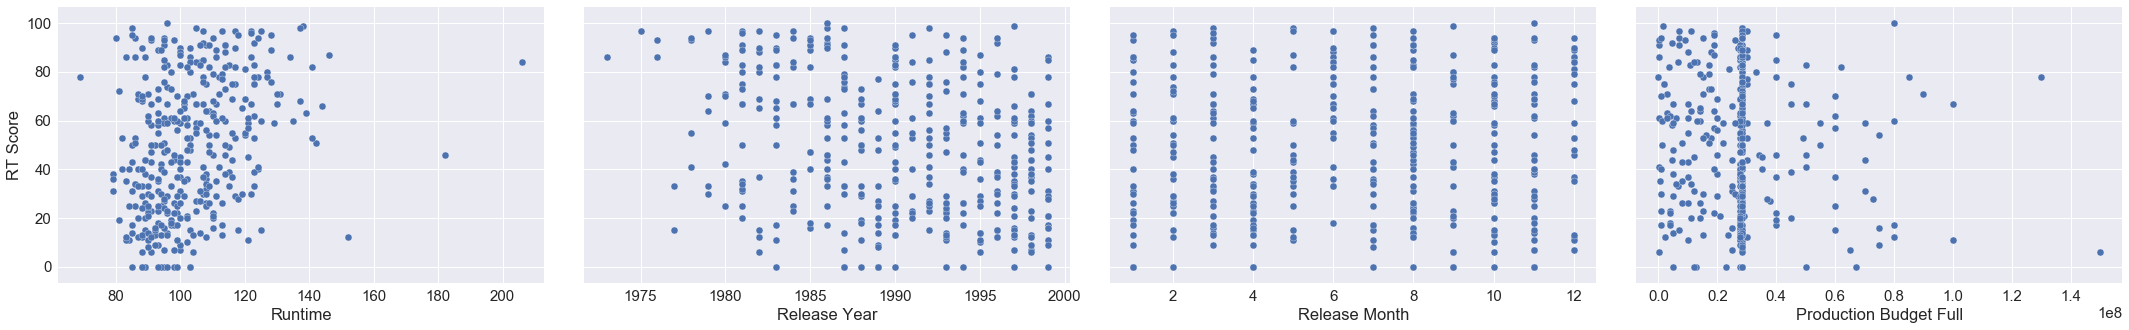

In [110]:
# Plot variable-to-variable relations as scatterplots
sns.pairplot(df_pre2000, size = 5, aspect=1.5,
            y_vars=['RT Score'],
            x_vars=['Runtime', 'Release Year', 'Release Month','Production Budget Full'])

In [74]:
y_pre = df_pre2000['RT Score']
X_pre = df_pre2000[['Runtime log', 'Release Year', 'Release Month',
       'Production Budget 1/4', 'Terrorism', 'Future - Near', 'Sci-Fi Remake',
       'Remake - Asian', 'Post-Apocalypse', 'Video Game Adaptation', 'Prequel',
       'Comedy - Spoof', 'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']]

In [75]:
# Pre 2000 Dumb Model 
pred_dumb_pre = [np.mean(y_pre)]*len(y_pre)
res_dumb_pre = y_pre - pred_dumb_pre
mse_dumb_pre = find_mse(res_dumb_pre)

In [76]:
np.sqrt(mse_dumb_pre)

27.935218224197943

In [77]:
# Pre 2000 Basic Linear Regression
pred_pre, res_pre, summary_pre = LR_model(X_pre, y_pre, df_pre2000)
mse_pre = find_mse(res_pre)
summary_pre

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     6.614
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           2.77e-22
Time:                        16:03:40   Log-Likelihood:                -1697.4
No. Observations:                 378   AIC:                             3467.
Df Residuals:                     342   BIC:                             3608.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3740.7569    429.523      8.709      0.000    2895.917    4585.597
x[0]          52.0522     10.169      5.119      0.000      32.051      72.054
x[1]          -1.9803      0.214     -9.247      0.000      -2.402      -1.559
x[2]           0.2013      0.370      0.544      0.587      -0.527       0.929
x[3]          -0.1092      0.090     -1.216      0.225      -0.286       0.067
x[4]          -1.4427     11.084     -0.130      0.897     -23.245      20.359
x[5]          -3.8222     10.649     -0.359      0.720     -24.769      17.124
x[6]          17.9212     14.586      1.229      0.220     -10.768      46.611
x[7]        1.171e-13   4.45e-14      2.632      0.009    2.96e-14    2.05e-13
x[8]          14.1678     13.549      1.046      0.296     -12.482      40.818
x[9]         6.63e-16    2.7e-14      0.025      0.980   -5.25e-14    5.38e-14
x[10]        -44.6871     23.654     -1.889      0.060     -91.213       1.838
x[11]        -26.8574     13.841     -1.940      0.053     -54.081       0.367
x[12]          7.4534     11.824      0.630      0.529     -15.803      30.710
x[13]       5.168e-15   2.43e-14      0.213      0.832   -4.26e-14    5.29e-14
x[14]          2.9701      7.977      0.372      0.710     -12.719      18.659
x[15]         -0.7857      8.151     -0.096      0.923     -16.819      15.248
x[16]        -10.1514     13.699     -0.741      0.459     -37.096      16.793
x[17]         14.5550     25.042      0.581      0.561     -34.701      63.811
x[18]         68.8933     23.974      2.874      0.004      21.739     116.048
x[19]         16.5315     10.195      1.622      0.106      -3.520      36.583
x[20]          5.4921      6.712      0.818      0.414      -7.710      18.694
x[21]          3.2167      8.638      0.372      0.710     -13.773      20.206
x[22]        -15.2096      7.368     -2.064      0.040     -29.703      -0.717
x[23]         10.7096     16.789      0.638      0.524     -22.313      43.732
x[24]         21.8756      8.781      2.491      0.013       4.603      39.148
x[25]          8.3648      6.535      1.280      0.201      -4.489      21.219
x[26]         -0.6666      6.493     -0.103      0.918     -13.439      12.106
x[27]          5.7233      5.336      1.073      0.284      -4.773      16.219
x[28]         23.4399      6.454      3.632      0.000      10.745      36.135
x[29]         12.1439      5.869      2.069      0.039       0.600      23.688
x[30]         -2.6383      5.875     -0.449      0.654     -14.194       8.917
x[31]         26.6308      6.270      4.247      0.000      14.298      38.964
x[32]          6.0093     10.970      0.548      0.584     -15.568      27.586
x[33]         31.5221      5.501      5.730      0.000      20.701      42.343
x[34]         -4.6406      4.077     -1.138      0.256     -12.660       3.379
x[

In [78]:
np.sqrt(mse_pre)

21.572657083415415

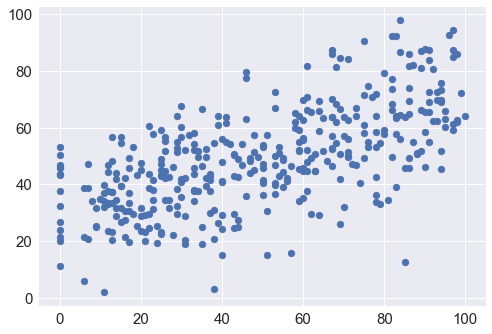

In [79]:
# plot_regfit_res(X_pre, y_pre, 0, pred_pre, res_pre)
plt.scatter(y_pre, pred_pre)

In [80]:
y_post = df_post2000['RT Score']
X_post = df_post2000[['Runtime', 'Release Year', 'Release Month',
       'Production Budget 1/4', 'Terrorism', 'Future - Near', 'Sci-Fi Remake',
       'Remake - Asian', 'Post-Apocalypse', 'Video Game Adaptation', 'Prequel',
       'Comedy - Spoof', 'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']]

In [81]:
# Post 2000 Dumb Model 
pred_dumb_post = [np.mean(y_post)]*len(y_post)
res_dumb_post = y_post - pred_dumb_post
mse_dumb_post = find_mse(res_dumb_post)

In [82]:
np.sqrt(mse_dumb_post)

26.82660363673752

In [83]:
pred_post, res_post, summary_post = LR_model(X_post, y_post, df_post2000)
mse_post = find_mse(res_post)
summary_post

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     5.540
Date:                Fri, 06 Oct 2017   Prob (F-statistic):           2.43e-20
Time:                        16:03:55   Log-Likelihood:                -2264.8
No. Observations:                 501   AIC:                             4608.
Df Residuals:                     462   BIC:                             4772.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1085.8222    484.324     -2.242      0.025   -2037.574    -134.070
x[0]           0.5136      0.091      5.624      0.000       0.334       0.693
x[1]           0.5455      0.240      2.272      0.024       0.074       1.017
x[2]           0.1560      0.327      0.477      0.633      -0.486       0.798
x[3]          -0.2453      0.079     -3.094      0.002      -0.401      -0.089
x[4]          -7.1439     11.408     -0.626      0.531     -29.563      15.275
x[5]          -5.5593     12.471     -0.446      0.656     -30.066      18.947
x[6]           2.3260     14.284      0.163      0.871     -25.744      30.396
x[7]          -5.3876     12.474     -0.432      0.666     -29.900      19.125
x[8]          17.4566     10.688      1.633      0.103      -3.547      38.460
x[9]         -30.0427      8.571     -3.505      0.001     -46.886     -13.199
x[10]         -6.9994      7.451     -0.939      0.348     -21.642       7.643
x[11]        -30.4556      8.448     -3.605      0.000     -47.058     -13.853
x[12]         -1.2333      7.689     -0.160      0.873     -16.342      13.876
x[13]         11.7272      7.146      1.641      0.101      -2.315      25.769
x[14]         -1.0678     13.943     -0.077      0.939     -28.468      26.332
x[15]        -13.9568     11.925     -1.170      0.242     -37.391       9.478
x[16]          3.5498     10.819      0.328      0.743     -17.711      24.811
x[17]         20.6955      6.695      3.091      0.002       7.539      33.852
x[18]         -0.5070      6.272     -0.081      0.936     -12.833      11.819
x[19]         -3.4689     10.398     -0.334      0.739     -23.902      16.964
x[20]        -27.2632     10.326     -2.640      0.009     -47.554      -6.972
x[21]         -1.8540      8.624     -0.215      0.830     -18.800      15.092
x[22]         -1.1089      9.049     -0.123      0.903     -18.890      16.673
x[23]         -8.2119      4.883     -1.682      0.093     -17.807       1.384
x[24]         11.1395      5.408      2.060      0.040       0.512      21.767
x[25]         -9.0628      6.863     -1.321      0.187     -22.549       4.423
x[26]         -9.6516      5.377     -1.795      0.073     -20.217       0.914
x[27]         -0.7917      5.943     -0.133      0.894     -12.471      10.887
x[28]         -5.8613      5.171     -1.134      0.258     -16.023       4.300
x[29]          4.1587      5.846      0.711      0.477      -7.329      15.646
x[30]          3.4062      5.589      0.609      0.542      -7.576      14.388
x[31]         11.6976      5.899      1.983      0.048       0.105      23.290
x[32]          0.4059      4.215      0.096      0.923      -7.876       8.688
x[33]         10.4266      6.163      1.692      0.091      -1.683      22.537
x[34]        -18.2527      4.821     -3.786      0.000     -27.726      -8.779
x[

In [84]:
np.sqrt(mse_post)

22.234957688013548

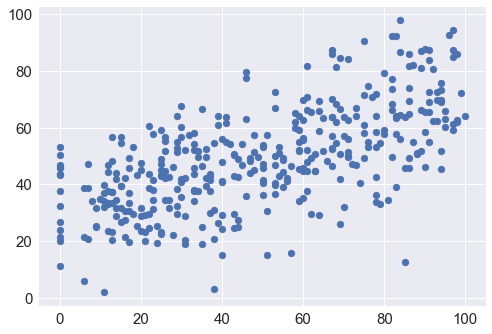

In [85]:
# plot_regfit_res(X_post, y_post, 3, pred_post, res_post)
plt.scatter(y_pre, pred_pre)

# FRESH VS ROTTEN
Do some investigating to see if there are any differences between the binary rotten vs fresh

In [86]:
df_top = df.sort_values('RT Score', ascending=False)
df_fresh = df_top[df_top['RT Score'] >= 60]
df_rotten = df_top[df_top['RT Score'] <= 59]


In [87]:
df_fresh.describe() # the fresh tomatoes 

,RT Score,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,Post-Apocalypse,...,Horror - R-Rated,Runtime log,Production Budget 1/4,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010],Post 2000,Fall or not
count,313.000000,313.000000,313.000000,313.000000,3.130000e+02,313.000000,313.000000,313.000000,313.000000,313.000000,...,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,77.629393,105.849840,1999.201278,6.779553,2.884637e+07,0.012780,0.015974,0.022364,0.006390,0.025559,...,0.469649,4.650091,67.970171,0.028754,0.230032,0.220447,0.246006,0.274760,0.520767,0.325879
std,10.946696,17.124351,11.952674,3.318455,2.649003e+07,0.112502,0.125577,0.148102,0.079808,0.158069,...,0.499877,0.152065,16.909618,0.167382,0.421527,0.415212,0.431372,0.447108,0.500369,0.469453
min,60.000000,69.000000,1973.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.234107,8.801117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,94.000000,1988.000000,4.000000,1.500000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.543295,62.233298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.000000,102.000000,2001.000000,7.000000,2.842492e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.624973,73.017142,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,86.000000,115.000000,2010.000000,10.000000,2.842492e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.744932,73.017142,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,100.000000,206.000000,2017.000000,12.000000,1.900000e+08,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.327876,117.405489,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
df_rotten.describe() # the rotten tomatoes

,RT Score,Runtime,Release Year,Release Month,Production Budget Full,Terrorism,Future - Near,Sci-Fi Remake,Remake - Asian,Post-Apocalypse,...,Horror - R-Rated,Runtime log,Production Budget 1/4,dec[1970],dec[1980],dec[1990],dec[2000],dec[2010],Post 2000,Fall or not
count,566.000000,566.000000,566.000000,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000,...,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,29.429329,98.770318,2001.500000,6.388693,2.819187e+07,0.012367,0.010601,0.007067,0.017668,0.005300,...,0.551237,4.585382,68.790901,0.010601,0.134276,0.257951,0.360424,0.236749,0.597173,0.356890
std,16.521516,12.517608,9.701701,3.380445,2.236264e+07,0.110617,0.102503,0.083843,0.131858,0.072675,...,0.497808,0.119874,14.667637,0.102503,0.341250,0.437894,0.480548,0.425463,0.490900,0.479506
min,0.000000,72.000000,1977.000000,1.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.276666,11.066819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,90.000000,1995.000000,3.000000,1.500000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.499810,62.233298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,96.000000,2003.000000,7.000000,2.773318e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.564348,72.568798,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,43.000000,106.000000,2009.000000,9.000000,2.842492e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.663439,73.017142,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,59.000000,182.000000,2017.000000,12.000000,1.900000e+08,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.204007,117.405489,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# COMPARE RT_MSE VALUES

In [89]:
mse_list

[('LR all SG 37X', 568.39146497497006),
 ('LR Dumb Model', 750.68053856836389),
 ('First LR 18X', 612.29258649607743),
 ('First LR 18X', 612.29258649607743),
 ('LR Transformed 18X', 608.06221244629137),
 ('LR Low P-value X', 625.40344608452244),
 ('LR Decades as Categories', 650.72727135961236),
 ('LR Decades as Categories', 650.72727135961236),
 ('LR Post200 Category', 678.39721773827114)]

In [90]:
# This is the root mean squared error
# Essentially, how many percentage points off the observed points each model is
rtmse_list = [(x[0], np.sqrt(x[1])) for x in mse_list]
rtmse_list.sort(key=lambda x: x[1])
rtmse_list

[('LR all SG 37X', 23.840961913793873),
 ('LR Transformed 18X', 24.658917503537971),
 ('First LR 18X', 24.744546601141785),
 ('First LR 18X', 24.744546601141785),
 ('LR Low P-value X', 25.008067619960613),
 ('LR Decades as Categories', 25.509356545385703),
 ('LR Decades as Categories', 25.509356545385703),
 ('LR Post200 Category', 26.046059543398712),
 ('LR Dumb Model', 27.398549935505052)]

# Subgenres Average Ratings

In [91]:
df_sg = df[['RT Score', 'Terrorism', 'Future - Near', 'Sci-Fi Remake',
       'Remake - Asian', 'Post-Apocalypse', 'Video Game Adaptation', 'Prequel',
       'Comedy - Spoof', 'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']]

In [92]:
sg_col = len(df_sg.columns)

In [93]:
sg = ['Terrorism', 'Future - Near', 'Sci-Fi Remake',
       'Remake - Asian', 'Post-Apocalypse', 'Video Game Adaptation', 'Prequel',
       'Comedy - Spoof', 'Comic Book Adaptation', 'IMAX (Feature-length)',
       'Sci-Fi - Based on Book', 'Werewolf', 'Remake - Foreign Thrills',
       'Foreign Language', 'Found Footage', 'Action Heroine',
       'Thriller - Erotic', 'Horror Anthology', 'Horror - Terror in the Water',
       'Horror - Torture', 'Horror - Period',
       'Thriller - Psycho / Stalker / Blank from Hell', 'Vampire',
       'Creature Feature', 'Thriller - Serial Killer', 'Zombie',
       'Sci-Fi Horror', 'Thriller - Political', 'Horror Remake', 'Neo Noir',
       'Horror - Slasher', 'Horror Comedy', 'Horror - Supernatural',
       'Horror - R-Rated']
for i in range(1,sg_col):
    df_sg.iloc[:,i] = df_sg.iloc[:,i] * df_sg.iloc[:,0]

/Users/carliebadder/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [94]:
df_sg.drop('RT Score', axis=1, inplace=True)

/Users/carliebadder/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
sg_means=[]
for i in sg:
    temp_mean = (df_sg[i].iloc[df_sg[i].nonzero()]).mean()
    sg_means.append(temp_mean)

In [96]:
sg_mean_list = [[sg[i], sg_means[i]] for i in range(34)]

In [97]:
sg_mean_list.sort(key=lambda x: x[1], reverse=True)

In [98]:
sgm = [x[1] for x in sg_mean_list]
sgt = [x[0] for x in sg_mean_list]

In [99]:
sg_low_pval

[(9, 'Video Game Adaptation', -32.658855007863679),
 (11, 'Comedy - Spoof', -26.469545610089074),
 (34, 'Horror - Slasher', -11.199058349393836),
 (36, 'Horror - Supernatural', -10.711399399425659),
 (26, 'Vampire', -8.7015911045132945),
 (37, 'Horror - R-Rated', 4.539833266561863),
 (24, 'Horror - Period', 11.146439272141198),
 (35, 'Horror Comedy', 12.57950602827696),
 (31, 'Thriller - Political', 12.775637162147383),
 (33, 'Neo Noir', 15.262944809747514),
 (13, 'IMAX (Feature-length)', 17.77898993975003),
 (17, 'Foreign Language', 20.9968135230007)]

In [100]:
sg_neg = [x[1] for x in sg_low_pval if x[2] < 0]
sg_pos = [x[1] for x in sg_low_pval if x[2] > 0]

In [101]:
sg_pos_i = [i for i,t in enumerate(sgt) if t in sg_pos]
sg_neg_i = [i for i,t in enumerate(sgt) if t in sg_neg]

In [102]:
sg_pos_i

[0, 1, 3, 7, 9, 10, 18]

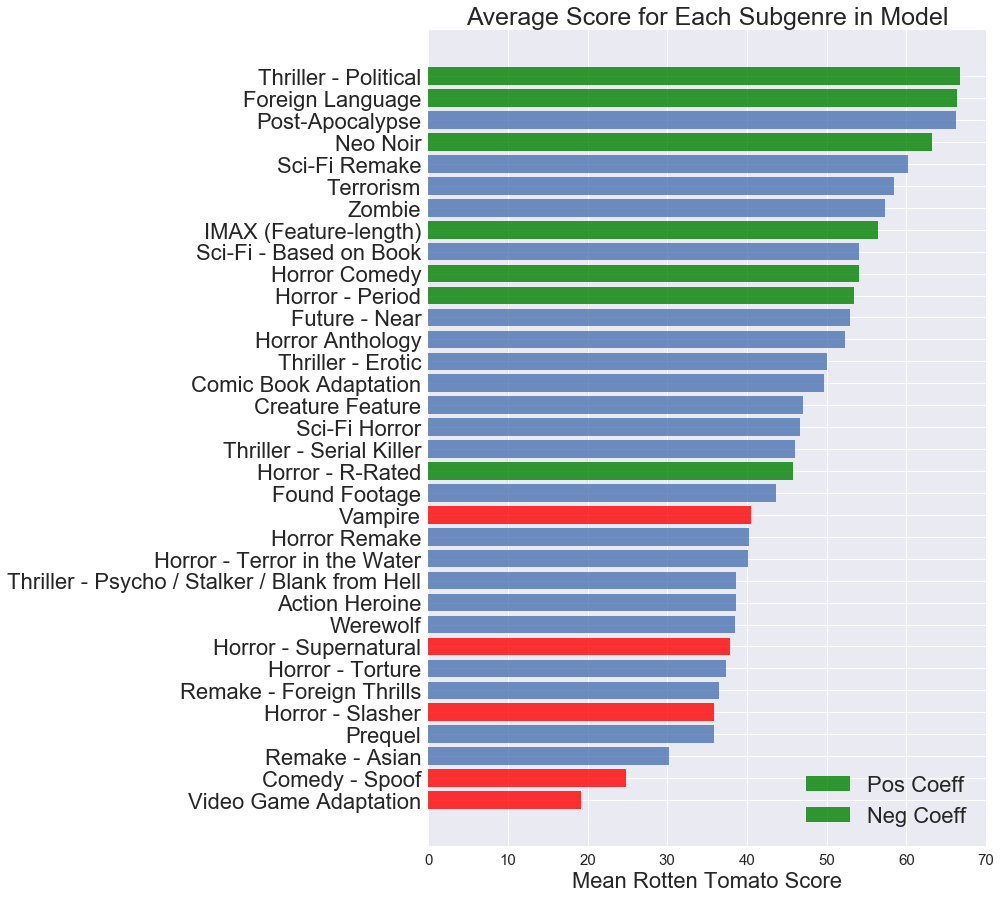

In [103]:
plt.figure(figsize=(10,15))

y_pos = np.arange(len(sgt),0,-1) 
fig = plt.barh(y_pos, sgm, align='center', alpha=0.8)

for n in sg_neg_i:
    fig[n].set_facecolor('r')
    fig[n].set_label('Neg')
    
for p in sg_pos_i:
    fig[p].set_facecolor('g')
    fig[p].set_label('Pos')

plt.legend(('Pos Coeff','Neg Coeff'), loc=4, fontsize=22)
    
plt.yticks(y_pos, sgt, fontsize=22)
plt.xlabel('Mean Rotten Tomato Score', fontsize=22)
plt.title('Average Score for Each Subgenre in Model', fontsize=25)
